In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

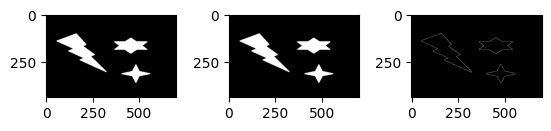

In [34]:
# Load image
img = cv2.imread('Contour_and_ConvexHull_use.png')
# Change to gray scale
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Find edges
edge_image = cv2.Canny(img_gray,250,cv2.ADAPTIVE_THRESH_MEAN_C)


plt.subplot(131),plt.imshow(img,cmap='gray')
plt.subplot(132),plt.imshow(img_gray,cmap='gray')
plt.subplot(133),plt.imshow(edge_image,cmap='gray')
plt.subplots_adjust(hspace=0.5,wspace=0.4)
plt.show()

In [31]:
contours, hierarchy = cv2.findContours(edge_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

### ConvexHull 
<i>find convexHull for each contour ,and then draw it</i>

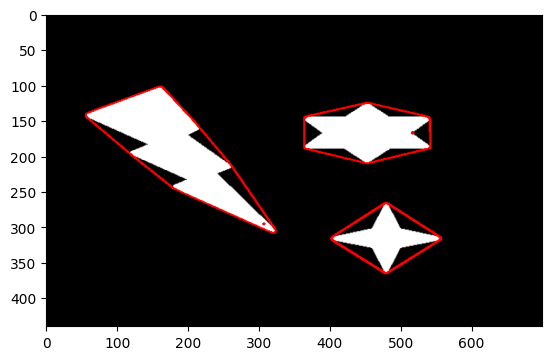

In [32]:
img_1 = img.copy()

for contour in contours:
    # find ConvexHull for each contour
    convexHull = cv2.convexHull(contour)
    # draw the ConvexHull
    cv2.drawContours(img_1, [convexHull], -1, (255, 0, 0), 2)

# Display the Final ConvexHull image
plt.imshow(img_1)
plt.show()

#### Convexity Defects

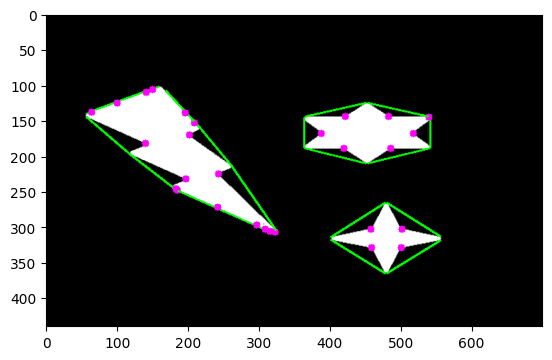

In [33]:
# Copy of the main image
img_2 = img.copy()

# Find contour in the gray image
contours, hierarchy = cv2.findContours(img_gray,2,1)

for cnt in contours:
    # for each contour find the ConvexHull
    hull = cv2.convexHull(cnt, returnPoints = False)
    
    # find the convexitydefect for the contour uing Hull
    defects = cv2.convexityDefects(cnt, hull)

    # draw the DefectPoint and it's Adjacent Lines
    for i in range(defects.shape[0]):
        # Get the hull-defect points    
        s, e, f, d = defects[i, 0]
        # s, e, f, d are as follows[Line_end_point_1, Line_end_point_2, ConvexityDefect_point, Convexity_Distance]
        
        # Drw the line btw Adjacent points
        start = tuple(cnt[s][0])
        end = tuple(cnt[e][0])
        cv2.line(img_2, start, end, [0,255,0], 2)

        # draw a cicle at the Defect_point
        far = tuple(cnt[f][0])
        cv2.circle(img_2, far, 5, [255,0,255], -1)
    
# Show final image
plt.imshow(img_2)
plt.show()